# clasificación

In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [37]:
class NeuralNetwork:
    def __init__(self, epochs=50, batch_size=16, learning_rate=0.01):
        #inicializo algunos parámetros como épocas, batch_size, learning rate
        #(no son necesarios)
        #se puede agregar la cantidad de capas, la cantidad de neuronas por capa (pensando en hacer una clase que pueda ser usada para cualquier caso)
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.model = None

    def build_model(self, input_shape, num_classes):
        # ejemplo con 2 capas ocultas de 64 neuronas y activación softmax (multiclase, recibe la cantidad de clases como input, además del input_shape)
        model = tf.keras.models.Sequential([
            #tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(input_shape,)),
            tf.keras.layers.Dense(30, activation='relu'),
            tf.keras.layers.Dense(26, activation='relu'),
            tf.keras.layers.Dense(24, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])

        #compilo el modelo con el optimizador Adam, la función de pérdida categorical_crossentropy y la métrica accuracy
        #totalmente optimizable e incluso pueden ser parámetros de la función build_model
        
        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        self.model = model

    def train(self, X_train, y_train, X_valid, y_valid):
        # simplemente el fit del modelo. Devuelvo la evolución de la función de pérdida, ya que es interesante ver como varía a medida que aumentan las épocas!
        history=self.model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=self.epochs, batch_size=self.batch_size)
        return history.history['loss'], history.history['val_loss']

    def evaluate(self, X_test, y_test):
        ### evalúo en test
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print(f"test accuracy: {accuracy:.4f}")

    def predict(self, X_new):
        ### predicciones
        predictions = self.model.predict(X_new)
        return predictions
    

    ### acá también me podría armar una función para graficar la evolución de la función de pérdida en train y validación, etc etc

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

nn = NeuralNetwork(epochs=200, batch_size=64, learning_rate=0.05)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### escalado de datos !!! 


### en este caso tenemos más de 2 clases, por lo que necesitamos hacer one hot encoding en la salida, para este modelo en particular.
y_train=tf.keras.utils.to_categorical(y_train)
y_valid=tf.keras.utils.to_categorical(y_valid)
y_test=tf.keras.utils.to_categorical(y_test)

#buildeo el modelo
nn.build_model(input_shape=X_train.shape[1], num_classes=y_train.shape[1])

# entreno el modelo
history=nn.train(X_train, y_train, X_valid, y_valid)

# evaluo metricas
nn.evaluate(X_test, y_test)

## predicciones...

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.3368 - loss: 1.2785 - val_accuracy: 0.2083 - val_loss: 1.8936
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3455 - loss: 1.5365 - val_accuracy: 0.3333 - val_loss: 1.0230
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4080 - loss: 1.0306 - val_accuracy: 0.5417 - val_loss: 0.9339
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6927 - loss: 0.8792 - val_accuracy: 0.5417 - val_loss: 0.7461
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6979 - loss: 0.6918 - val_accuracy: 0.5417 - val_loss: 0.5955
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7031 - loss: 0.5303 - val_accuracy: 0.7917 - val_loss: 0.4572
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6337 - loss: 0.4808 - val_accuracy: 0.6250 - val_loss: 0.4548
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7552 - loss: 0.4276 - val_accuracy: 0.5417 - val_loss

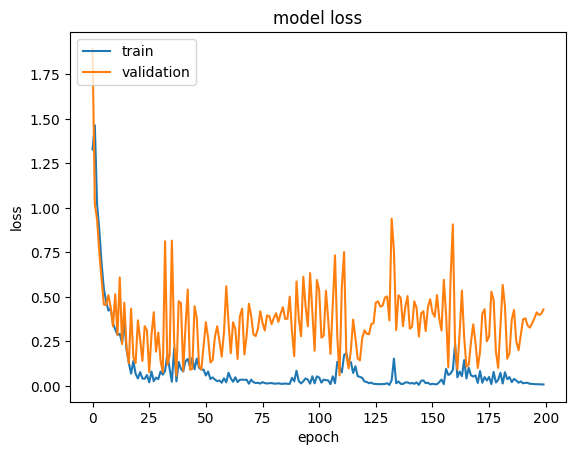

In [39]:
import matplotlib.pyplot as plt

plt.plot(history[0], label='train')
plt.plot(history[1], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# regresión

In [43]:
class NeuralNetworkRegressor:
    def __init__(self, epochs=50, batch_size=16, learning_rate=0.01, dropout_rate=0):
        #inicializo algunos parámetros como épocas, batch_size, learning rate
        #(no son necesarios)
        #se puede agregar la cantidad de capas, la cantidad de neuronas por capa
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.model = None

    def build_model(self, input_shape):
        # ejemplo con 2 capas ocultas de 64 neuronas, la saida en este caso es solo una neurona, con activación lineal
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, activation='relu', input_shape=(input_shape,)),
           # tf.keras.layers.Dense(10, activation='relu', input_shape=(input_shape,), kernel_regularizer=tf.keras.regularizers.l2(0.1)),
            tf.keras.layers.Dropout(self.dropout_rate),
           # tf.keras.layers.Dense(64, activation='relu'),
            #  tf.keras.layers.Dropout(self.dropout_rate),
            tf.keras.layers.Dense(1)
        ])

        #compilo el modelo con el optimizador Adam, la función de pérdida mse y métrica mse también
        #totalmente optimizable e incluso pueden ser parámetros de la función build_model
        
        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        
        self.model = model

    def train(self, X_train, y_train, X_valid, y_valid):
        # simplemente el fit del modelo. Devuelvo la evolución de la función de pérdida, ya que es interesante ver como varía a medida que aumentan las épocas!
        history=self.model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=self.epochs, batch_size=self.batch_size)
        return history.history['loss'], history.history['val_loss']

    def evaluate(self, X_test, y_test):
        ### evalúo en test
        loss, mse = self.model.evaluate(X_test, y_test)
        print(f"test MSE: {mse:.4f}")

    def predict(self, X_new):
        ### predicciones
        predictions = self.model.predict(X_new)
        return predictions
    

    ### acá también me podría armar una función para graficar la evolución de la función de pérdida en train y validación, etc etc

In [50]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_valid = x_scaler.transform(X_valid)
y_valid = y_scaler.transform(y_valid)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

nnr= NeuralNetworkRegressor(epochs=70, batch_size=128, learning_rate=0.01, dropout_rate=0.6)
nnr.build_model(input_shape=X_train.shape[1])
history=nnr.train(X_train, y_train, X_valid, y_valid)

# evaluo metricas
nnr.evaluate(X_test, y_test)

Epoch 1/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 5.9761 - mae: 1.8144 - val_loss: 3.2567 - val_mae: 1.4588
Epoch 2/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6527 - mae: 1.4652 - val_loss: 2.3924 - val_mae: 1.2466
Epoch 3/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1341 - mae: 1.3615 - val_loss: 1.8243 - val_mae: 1.0827
Epoch 4/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.1071 - mae: 1.1136 - val_loss: 1.4391 - val_mae: 0.9528
Epoch 5/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.8912 - mae: 1.0625 - val_loss: 1.1859 - val_mae: 0.8553
Epoch 6/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6748 - mae: 1.0371 - val_loss: 1.0111 - val_mae: 0.7914
Epoch 7/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2618 - mae: 0.8910 - val_loss: 0.8926 - val_mae: 0.7478
Epoch 8/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0786 - mae: 0.8291 - val_loss: 0.8107 - val_mae: 0.7166
Epoch 9/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2327 - mae: 0.8968 - 

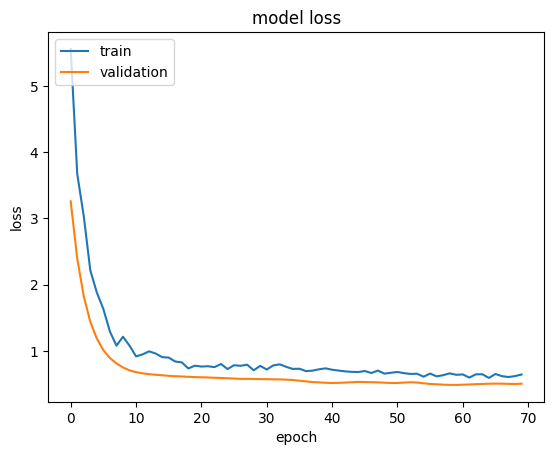

In [51]:
### ploteo de la evolución de la función de pérdida
plt.plot(history[0], label='train')
plt.plot(history[1], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
